In [52]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

print("Data Shape:",df.shape)
df.head()

Data Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


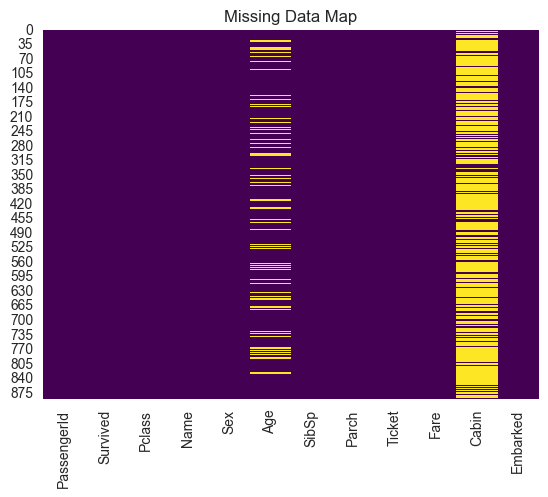

In [64]:
print(df.isnull().sum())
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title("Missing Data Map")
plt.show()

In [67]:
df['Age']=df['Age'].fillna(df['Age'].median())
print("Missing Age values after fix:",df['Age'].isnull().sum())

Missing Age values after fix: 0


In [68]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


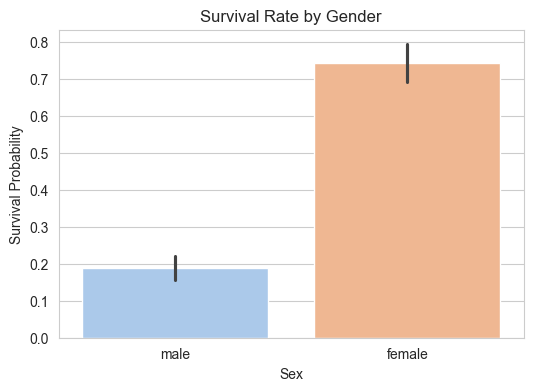

In [69]:
plt.figure(figsize=(6,4))
sns.barplot(x='Sex',y='Survived',data=df,hue='Sex',palette='pastel')
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Probability")
plt.show()

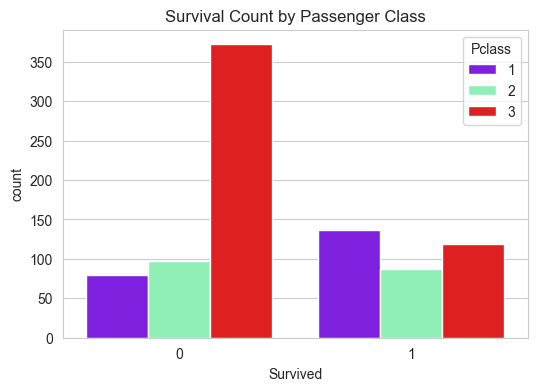

In [70]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')
plt.title("Survival Count by Passenger Class")
plt.show()

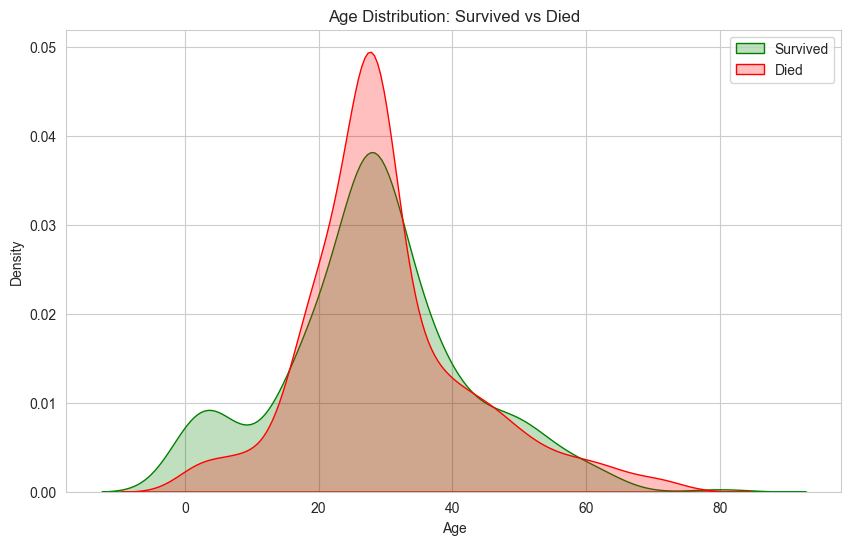

In [71]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['Survived']==1]['Age'],fill=True,color='green',label='Survived')
sns.kdeplot(df[df['Survived']==0]['Age'],fill=True,color='red',label='Died')
plt.title("Age Distribution: Survived vs Died")
plt.legend()
plt.show()

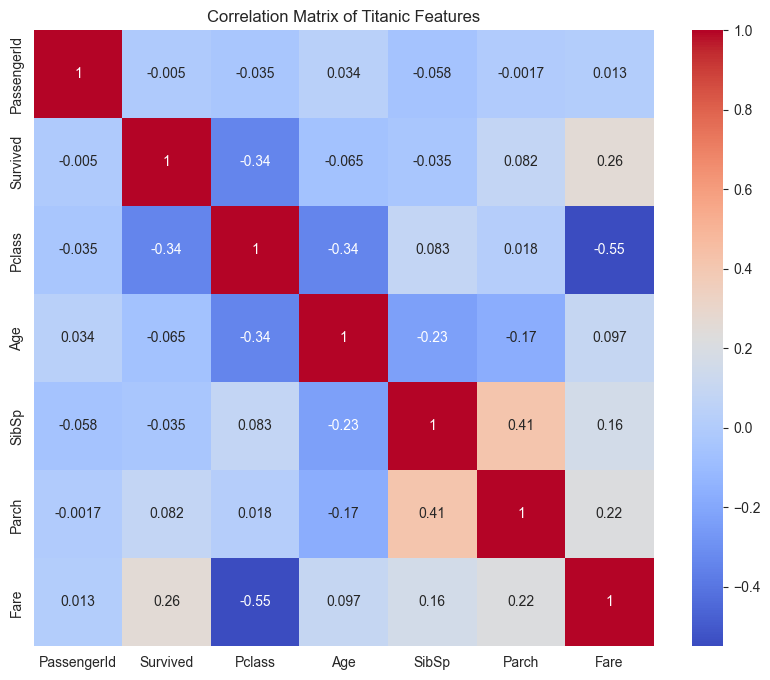

In [72]:
numeric_df=df.select_dtypes(include=['number'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix of Titanic Features")
plt.show()